In [17]:
import pandas as pd # pandas is for data manipulation
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization

In [2]:
import os

After importing libraries, explore the data.!


In [3]:
os.chdir("C:\ProgramData\Anaconda3\Lib\site-packages\pandas\io")

Lest read Movies dataset.

In [4]:
movies=pd.read_csv("movies.csv")

In [6]:
movies.shape

(27278, 3)

In [7]:
movies.head(10)#displays first 10 entries

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Lets read Ratings now!

In [9]:
ratings=pd.read_csv("ratings.csv")

In [10]:
ratings.shape

(1048575, 4)

In [12]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [13]:
min_rating=ratings['rating'].min()
max_rating=ratings['rating'].max()

In [14]:
max_rating


5.0

In [15]:
min_rating

0.5

In [16]:
ratings['rating'].mean()  #average rating fo all the movues in the dataset

3.5292716305462175

In [18]:
tags=pd.read_csv("tags.csv")
tags.shape

(465564, 4)

In [35]:
tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


Now..Lets check if the data is clean and clear or not!

Here we are using isnull function to see if there are any.


In [19]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [20]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [21]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We can see that there are some null values in the tags data set

So we are going to clean the data set by deleting them using the drop.na function

In [22]:
tags=tags.dropna()

In [23]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

Lets analyse the given data now!

In [24]:
Romance_movies=movies['genres'].str.contains('Romance')

In [30]:
movies[Romance_movies].head()

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
14,15,Cutthroat Island (1995),Action|Adventure|Romance


In [31]:
Drama_movies=movies['genres'].str.contains('Drama')
Drama_movies.shape

(27278,)

In [33]:
Comedy_movies=movies['genres'].str.contains('Comedy')
Comedy_movies.shape

(27278,)

In [38]:
movie_search = movies['title'].str.contains('iron')
movies[movie_search].head(10)

,movieId,title,genres
6985,7097,"Girl From Paris, A (hirondelle a fait le print...",Comedy|Drama
11325,48161,Gridiron Gang (2006),Drama
18487,92136,We Won't Grow Old Together (Nous ne vieilliron...,Drama
22755,108895,Gamera vs. Guiron (1969),Action|Adventure


In [39]:
movie_search = movies['title'].str.contains('2000')
movies[movie_search].head(10)

,movieId,title,genres
1703,1772,Blues Brothers 2000 (1998),Action|Comedy|Musical
2683,2769,"Yards, The (2000)",Crime|Drama
3072,3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX
3090,3177,Next Friday (2000),Comedy
3103,3190,Supernova (2000),Adventure|Sci-Fi|Thriller
3138,3225,Down to You (2000),Comedy|Romance
3141,3228,Wirey Spindell (2000),Comedy
3152,3239,Isn't She Great? (2000),Comedy
3186,3273,Scream 3 (2000),Comedy|Horror|Mystery|Thriller
3188,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller


In [40]:
del ratings['timestamp']

In [41]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [42]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
#merge both movies and ratings datasets
movie_ratings=movies.merge(ratings,on = 'movieId',how = 'inner')
movie_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [48]:
high_rated=movie_ratings['rating']>4.0
low_rated=movie_ratings['rating']<2.0
movie_ratings[low_rated].head()

,movieId,title,genres,userId,rating
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
36,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,115,1.5
89,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,269,1.0
90,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,271,1.5
168,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,514,1.0


In [55]:
most_rated = movie_ratings.groupby('title').size().sort_values(ascending=False)
most_rated.head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
dtype: int64

In [64]:
movies['year'] =movies['title'].str.extract('\((.*)\)')
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [129]:
def count_word(data,column,typ):
    count = dict()
    for s in typ: count[s] = 0
    for x in data[column].str.split('|'):  
        for s in x : 
             count[s] += 1
   
    occurences = []
    for k,v in count.items():
        occurences.append([k,v])
    
    return occurences,count

In [130]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [136]:
occurences, dum=count_word(movies, 'genres', genre_labels)
occurences


[['Drama', 13344],
 ['Film-Noir', 330],
 ['Mystery', 1514],
 ['Sci-Fi', 1743],
 ['(no genres listed)', 246],
 ['Crime', 2939],
 ['Adventure', 2329],
 ['Western', 676],
 ['Action', 3520],
 ['Thriller', 4178],
 ['Fantasy', 1412],
 ['Children', 1139],
 ['Documentary', 2471],
 ['Musical', 1036],
 ['Horror', 2611],
 ['Animation', 1027],
 ['Comedy', 8374],
 ['IMAX', 196],
 ['War', 1194],
 ['Romance', 4127]]

In [139]:
words=dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100

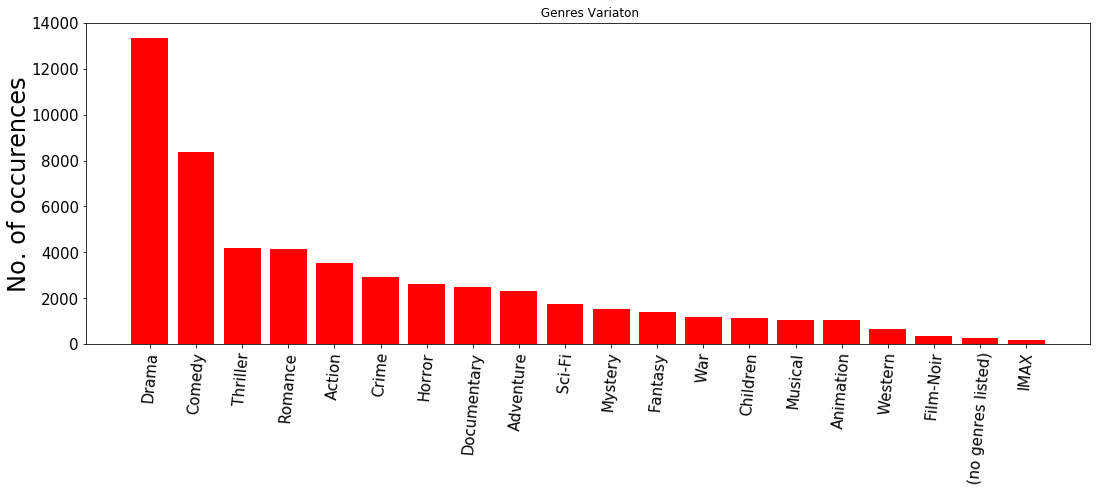

In [143]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title(" Genres Variaton")
plt.show()